## Linear Regression on newspaper dataset. 
### Predicting 'sunday' newspaper circulation using 'daily' newspaper circulation.

In [1]:
import pandas as pd
data=pd.read_csv("NewspaperData.csv")

In [2]:
data.head(15)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


#### From the above output,we can see that there are no null values in any of the columns.

### Finding correlation coefficient

In [4]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


#### From the above o/p--->the value of correlation coeff. b/w sunday & daily is 0.958154, which is strong positive correlation. So,we can use 'daily' circulation for predicting the 'sunday' circulation.

### Building a linear regression model

#### Here, the problem statement is we have to predict 'sunday' circulation using 'daily' circulation. So, the dependent variable 'y' will be 'sunday' and the independent variable 'x' will be 'daily'.

In [5]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data=data).fit() # ('y variable name ~ x variable name')

#### Generally,multiple models will be created, but we want the best fit model so here we are using fit() in the above code.

<AxesSubplot:xlabel='daily', ylabel='sunday'>

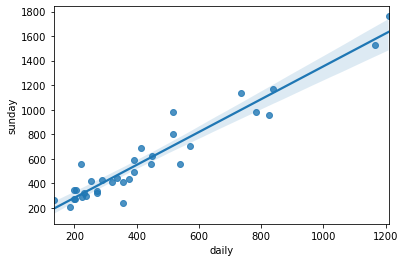

In [6]:
#Pattern of the linear regression model
import seaborn as sns
sns.regplot(x='daily',y='sunday',data=data)

#### The above o/p is a combination of scatter plot along with our model. The solid dark blue line represents the best model and the faint blue colour area represents the confidence interval which means our model has created multiple models in b/w that interval because of the 'fit' function we are getting the best model highlighted in dark blue colour.

In [9]:
#applying summary function on the model, in order to know about 'R-squared value','P-value of the input variable','coefficient value'.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           6.02e-19
Time:                        00:32:26   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above o/p--->'R-squared' value is 0.918 which is greater than 0.85  that means the model that has been build is the best model.
#### 'P value' for 'daily' is 0.000 which is less than 0.05 that means 'daily' circulation variable is the best input variable for predicting the output(i.e sunday circulation)

### Predicting 'sunday' circulation for new 'daily' data point

In [10]:
newdata=pd.Series([200,300]) #passing 2 new values that is 35th and 36th 'daily' newspaper value as 200,300

In [11]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [12]:
data_pred

,daily
0,200
1,300


In [13]:
#using our linear regression model that we have build to predict 'data_pred' data
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

#### So, the 2 values in the above output are the 'sunday' circulation values, if the 'daily' circulation values are 200 & 300 resp.

### Predicting the 'sunday' circulation values using the complete original dataset

In [14]:
model.predict(data)

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

#### In the above output, we have not mentioned what is the input and output variable, the model by itself will decide as we have given the same columns here also. So, by considering 'daily' as input,it has predicted the 'sunday' circulation of all the 34 newspapers.

#### Hence, we can predict 'sunday' circulation for individual 'daily' values(as before case) or for the complete dataset also(as above)